# Tasks

## Task 1: Source the Data Set

Import the Iris data set from the sklearn.datasets module.
Explain, in your own words, what the load_iris() function returns.

### Libraries

Resources:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html  

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [5]:
# First, import necessary libraries for importing data and whatever analysis follows
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder as le
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [6]:
#get the data from skilearn.
iris = sk.datasets.load_iris()


In [7]:
# take initial look at the data set

print(iris)

# look at the keys
iris.keys()


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
# in previous iterations i was having to do a lot of wok arounds because of how i loaded the dataset as a frame without the target names. 
# found this person's analysis: https://www.pycodemates.com/2022/05/iris-dataset-classification-with-python.html
# and tried the approach of loading as default and then converting to a frame
iris_df = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],  # Combine the data and target into one array
    columns=iris['feature_names'] + ['target'])

In [9]:
# target is now in as its index. i want it as categorical value. i can see from the keys above how the index maps onto each value so
# i know this is less dynamic but its easy and i saw a good few examples on stackoverflow: https://stackoverflow.com/questions/66801952/how-to-convert-numerical-species-into-categories-in-iris-dataset 
# Replace the numeric target values with species names
iris_df['species'] = iris_df['target'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [10]:
# i don't want to get the target column now that i have created my species column
# will use the drop function as seen here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html 

iris_df = iris_df.drop(columns=['target'])


## Task 2:  Explore the Data Structure

Print and explain the shape of the data set, the first and last 5 rows of the data, the feature names, and the target classes.

Resources:

https://www.geeksforgeeks.org/python-basics-of-pandas-using-iris-dataset/ 

https://www.geeksforgeeks.org/get-last-n-records-of-a-pandas-dataframe/ 

In [11]:
# next check the shape of iris data, meaning how many rows and how many columns. there are other parts of iris so have to specify data.
iris_df.shape

(150, 5)

In [12]:
# The target.
iris_df['species'] # from new df
iris['target_names']


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
# feature names
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
# return top 5 rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
# return bottom 5 rows
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [16]:
# double check the types of data in iris
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

## Task 3: Summarize the Data
For each feature calculate and display: mean, minimum, maximum, standard deviation, median

Resources: 

Jake VanderPlas. 2016. Python Data Science Handbook: Essential Tools for Working with Data (1st. ed.). O'Reilly Media, Inc.

https://www.geeksforgeeks.org/loop-or-iterate-over-all-or-certain-columns-of-a-dataframe-in-python-pandas/

In [17]:
#check exact column names first in case you need to reference them in code and so you know what to expect in output.
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [18]:
# Describe the data set.
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
# now median - describe gives 50% quartile which is the median. but it doesn't call it that.
# as a data check, produce median using a second method and verify results.
# make a loop to produce median for each feature_name column in the data
#Iterate over column names
for column in iris_df.columns:
    if iris_df[column].dtype in ['int64', 'float64']: # only do this for relevant columns, specifes is a string
        median_value = iris_df[column].median()  # Get the median of the column
        print(f"Median value for {column}: {median_value}")  # Print result

Median value for sepal length (cm): 5.8
Median value for sepal width (cm): 3.0
Median value for petal length (cm): 4.35
Median value for petal width (cm): 1.3


## Task 4: Visualize Features
Plot histograms for each feature using matplotlib.
Add appropriate titles and axis labels.

Resources:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

https://www.geeksforgeeks.org/box-plot-and-histogram-exploration-on-iris-data/ 

https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/ 

In [20]:
# put the columns into their own variables so i can do a histogram for each. give them short names for sake of writing code later.
sl = iris_df['sepal length (cm)']
sw = iris_df['sepal width (cm)']
pl = iris_df['petal length (cm)']
pw = iris_df['petal width (cm)']


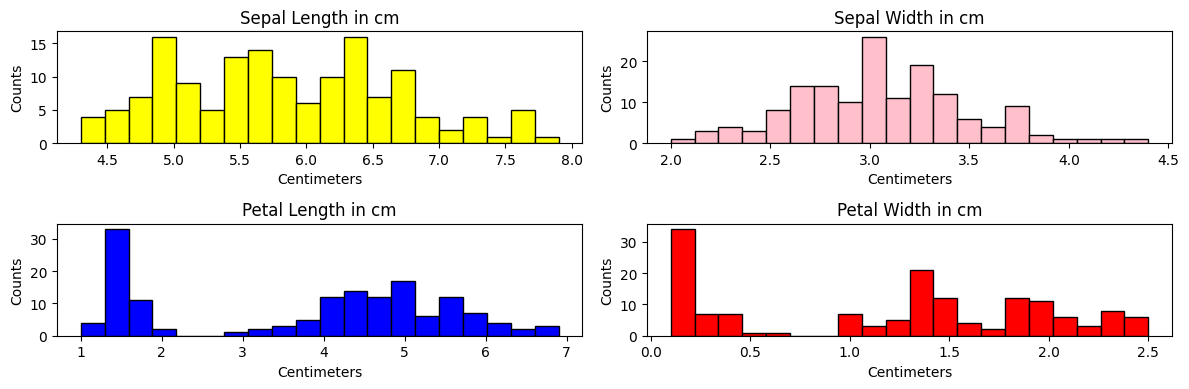

In [21]:
# Creating subplots with multiple histograms. i have 4 things to display so i'm doing a 2x2 plot. 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4))

# these axes figures dictate where on the plot the particular subplot will appear (e.g. 0,0 = first row, first column.)
axes[0,0].hist(sl, bins=20, color='Yellow', edgecolor='black')
axes[0,0].set_title('Sepal Length in cm')
 
axes[0,1].hist(sw, bins=20, color='Pink', edgecolor='black')
axes[0,1].set_title('Sepal Width in cm')

axes[1,0].hist(pl, bins=20, color='Blue', edgecolor='black')
axes[1,0].set_title('Petal Length in cm')

axes[1,1].hist(pw, bins=20, color='Red', edgecolor='black')
axes[1,1].set_title('Petal Width in cm')

# Adding labels and title. initial error iterating over each subplot individually- code adjusted by Microsoft Co-Pilot.
for ax in axes.flat:
    ax.set_xlabel('Centimeters')
    ax.set_ylabel('Counts')

# Adjusting layout for better spacing. without this all the titles start overlapping.
plt.tight_layout()
 
# Display the figure
plt.show()

## Task 5: Investigate Relationships

Choose any two features from the data set and create a scatter plot of them.
Color-code the three different classes of the scatter plot points.

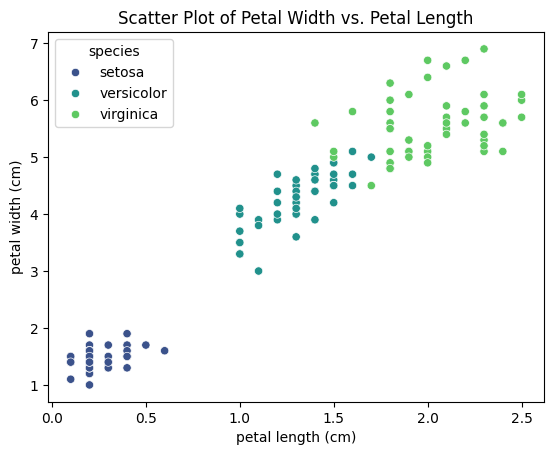

In [22]:
#  create figure and axis to plot onto
# following stucture of code in lecture and  here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
fig, ax = plt.subplots()

# ok after struggling for ages with matplot on using the different colours, i've swapped to seaborn since that's what everyone online seems to be suggesting
# basic code followed here: https://seaborn.pydata.org/generated/seaborn.scatterplot.html and https://www.geeksforgeeks.org/plotting-graph-for-iris-dataset-using-seaborn-and-matplotlib/ 
# Hue is a grouping variable that will produce points with different colors. Can be either categorical or numeric
# palette is like colour map in matplot so i checked here to make a choice: http://matplotlib.org/stable/users/explain/colors/colormaps.html 
sns.scatterplot(data=iris_df, x='petal width (cm)', y='petal length (cm)', hue='species', palette= 'viridis') 

# create some labels for the axes
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')

#add title to chart
plt.title('Scatter Plot of Petal Width vs. Petal Length')

#show the plt
plt.show()



## Task 6: Analyze Relationship

### Numpy's Polyfit according to GeeksforGeeks:

> Polynomial fitting is a form of regression analysis where the relationship between the independent variable xand the dependent variable y is modeled as an n-degree polynomial. The goal is to find the polynomial coefficients that minimize the difference between the observed data points and the values predicted by the polynomial.
>
> https://www.geeksforgeeks.org/numpys-polyfit-function-a-comprehensive-guide/ 

Linear Fit Coefficients: [ 0.41575542 -0.36307552]


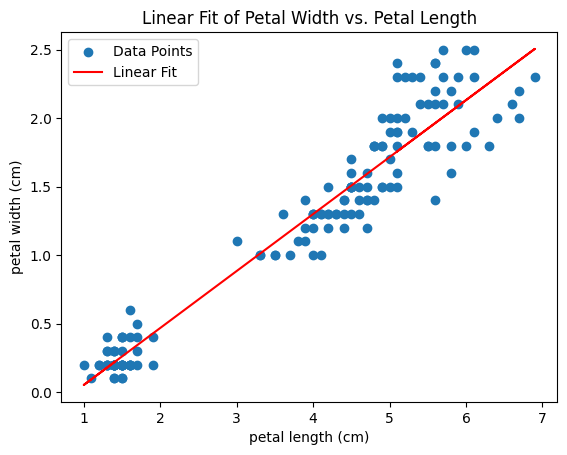

In [23]:
# just testing out how to plot - using g4g code to see how to do this with iris, will come back later and tailor it more to what i personally want to explore.
x = iris_df['petal length (cm)']
y = iris_df['petal width (cm)']

# Perform linear fit
coefficients = np.polyfit(x, y, 1)
print("Linear Fit Coefficients:", coefficients)

# Create polynomial function
p = np.poly1d(coefficients)

#plot this on a scatter plot, add labels of the data points, then plot the linear fit line.
plt.scatter(x, y, label='Data Points')
plt.plot(x, p(x), label='Linear Fit', color='red')
# create some labels for the axes
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Linear Fit of Petal Width vs. Petal Length')

plt.legend()
plt.show()

## Task 7: Analyze Class Distributions

In [24]:
# to make a boxplot in matplot you have to drop any non-numerical data. my data set has species. lets drop that for a boxplot friendly version of the df.
# see: https://www.nickmccullum.com/python-visualization/boxplot/ 
iris_boxplot = iris_df.drop(columns=['species'])

Text(0.5, 1.0, 'Side-by-Side Boxplots of Iris Features')

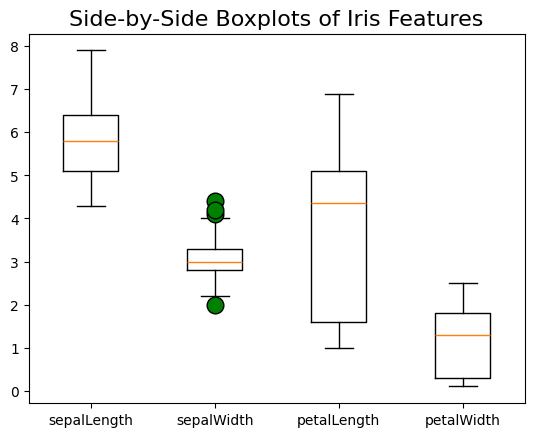

In [25]:
# Create figure, axis.
fig, ax = plt.subplots()

# before passing the data to the box plot function, i'm going to create flierprops as noted here: https://matplotlib.org/3.1.3/gallery/statistics/boxplot.html 
flierprops = dict(marker='o', markerfacecolor='green', markersize=12, linestyle='none')

# Create boxplot. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html 
ax.boxplot(iris_boxplot, flierprops=flierprops)

# # Set names of x-axis ticks.
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html
ax.set_xticks([1, 2, 3, 4], ["sepalLength", "sepalWidth", "petalLength", "petalWidth"], fontsize=10)
ax.set_title("Side-by-Side Boxplots of Iris Features", fontsize=16)

Text(0.5, 1.0, 'Compare the Distributions of Sepal Length')

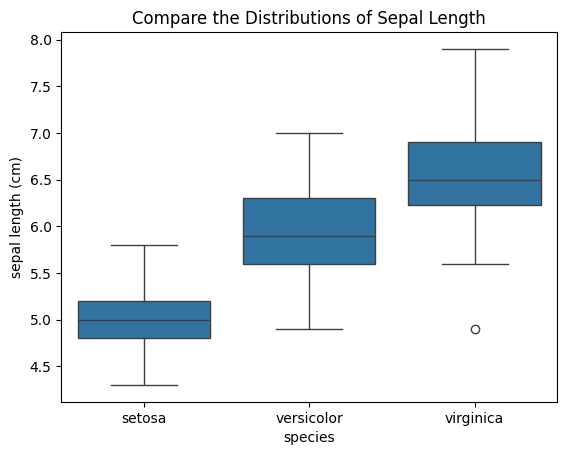

In [26]:
# that was a helpful overview of the data but i also want to check the individual class types and their distribution. I think it's quicker to use seaborn
# see: https://seaborn.pydata.org/generated/seaborn.boxplot.html

# how to set the title: https://how.dev/answers/how-to-add-a-title-to-a-seaborn-plot 
# im putting the different species across the x axis and using the sepal length column to plot my y. this is should give me the sepal length for all of the classes if my dataset is working how i want it to.
sns.boxplot(x="species", y="sepal length (cm)", data=iris_df).set_title("Compare the Distributions of Sepal Length")

Text(0.5, 1.0, 'Compare the Distributions of Sepal Width')

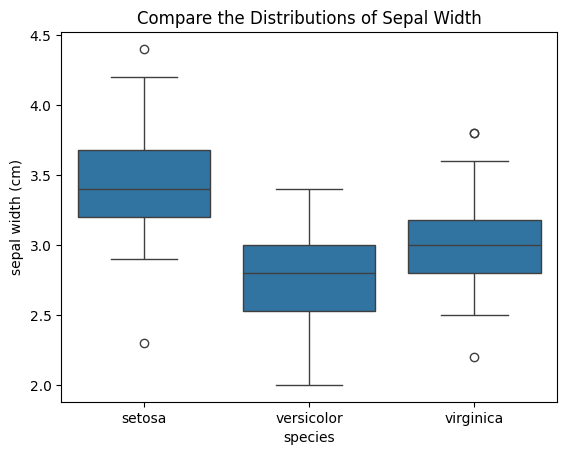

In [27]:
# repeat for other features
sns.boxplot(x="species", y="sepal width (cm)", data=iris_df).set_title("Compare the Distributions of Sepal Width")

Text(0.5, 1.0, 'Compare the Distributions of Petal Width')

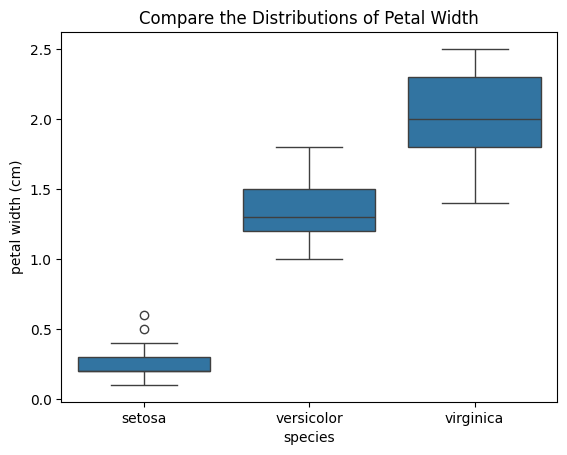

In [28]:
## repeat for other features
sns.boxplot(x="species", y="petal width (cm)", data=iris_df).set_title("Compare the Distributions of Petal Width")

Text(0.5, 1.0, 'Compare the Distributions of Petal Length')

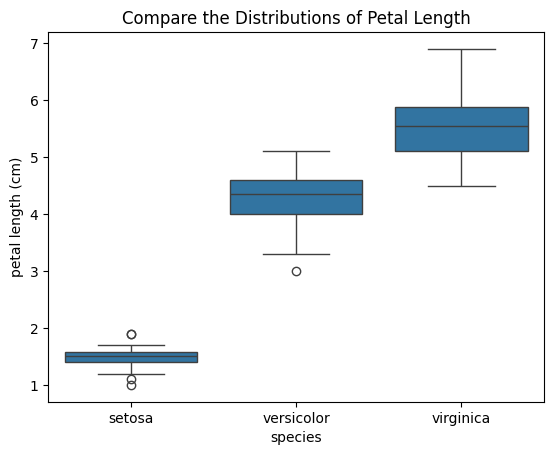

In [29]:
# repeat for other features
sns.boxplot(x="species", y="petal length (cm)", data=iris_df).set_title("Compare the Distributions of Petal Length")

## Task 8: Compute Correlations

In [ ]:
# https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn 
# set out the data I'll input to the regression function
x = iris_df["petal length (cm)"]
y = iris_df["petal width (cm)"]

In [35]:
# create a model that fits x points and y points using linear regression
model = LinearRegression().fit(x, y)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
# get the results of the fit
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

## Task 9: Fit a Simple Linear Regression

## Task 10: Too Many Features

## END